1. Sugeneruokite dvi grupes (klases) po 10 duomenų įrašų (dvimačių taškų), kurie būtų
tiesiškai atskiriami (𝑛 = 2, 𝑚 = 20). Norint įsitikinti, kad duomenys sugeneruoti teisingai,
atvaizduokite duomenų taškus Dekarto (XY) koordinačių sistemoje. Skirtingų klasių taškus
vaizduokite skirtingomis spalvomis. Išsaugokite sugeneruotus duomenis, kadangi jie bus
naudojami kituose užduoties punktuose. <br><br>
------------ <br>
2. Žemiau
3. Žemiau
4. Žemiau
<br>------------ <br>
5. Atsižvelgiant į svorių ir poslinkių reikšmes, gautas 3-iame punkte (naudojama slenkstinė
aktyvacijos funkcija), suformuoti klases skiriančias tieses ir jas nubraižyti tame pačiame
paveiksle, kuris buvo nubraižytas 1-ame punkte. Kadangi 3-iame punkte buvo gauti trys
svorių ir poslinkio rinkiniai, tokių tiesių turi būti trys. Vaizduokite jas skingomgo isalvom
spmis .
2
6. Tame pačiame paveiksle pavaizduokite vektorius, atitinkančius gautus neurono svorius.
Vektoriaus pradžią įtakoja poslinkio reikšmė, tad vektoriaus pradžia turi būti ant klases
skiriančios tiesės. Klases skiriančią tiesę ir atitinkamą vektorių vaizduokite ta pačia spalva.
Vektoriais turi būti statmeni tiesėms. Jei taip nėra, pažiūrėkite x ir y ašys atvaizduotos
tinkamai.

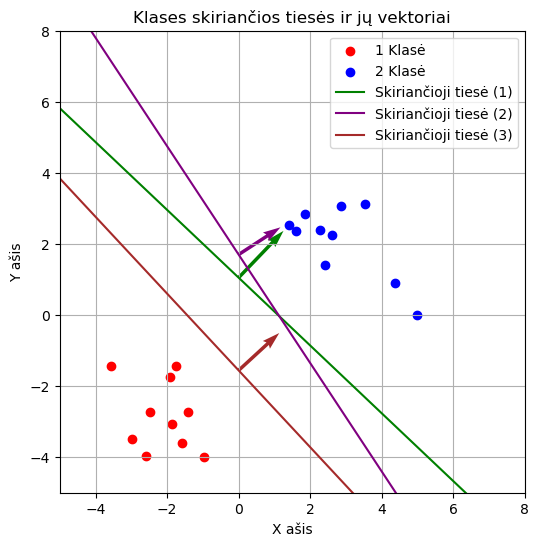

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math


def generate_data(n, m): #sukuriami du masyvai, kurie turi po m/n duomenu su n-maciu skaiciumi.
    np.random.seed(22) #Uztikrinam, kad kiekviena karta paleidziant sia funkcija rezultatas butu toks pat (ChatGPT pasiulymas).
    class_0 = np.random.randn(m//n, n) + [-2.5, -2.5]  
    class_1 = np.random.randn(m//n, n) + [2.5, 2.5]
    return class_0, class_1
    
def plot_data(class_0, class_1, weight_array_step): #atvaizduojami sugeneruoti duomenys
    plt.figure(figsize=(6, 6))
    plt.scatter(class_0[:, 0], class_0[:, 1], color='red', label='1 Klasė') #atvaizduojame X ir Y reiksmes pirmosios klases
    plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', label='2 Klasė') #atvaizduojame X ir Y reiksmes pirmosios klases

    colors = ['green', 'purple', 'brown']
    
    for i, (w1, w2, b) in enumerate(weight_array_step):
        
        
        #ChatGPT rasyto kodo pradzia ---
        x_vals = np.linspace(-8, 8, 100)
        #(savo sugebejimais) sudaroma klases skirianciu tiesiu formule: w1*x + w2*y + b = 0  => y = -(w1/w2)*x - b/w2
        y_vals = -(w1 / w2) * x_vals - (b / w2)
        plt.plot(x_vals, y_vals, color=colors[i], label=f'Skiriančioji tiesė ({i+1})')
        
        # Pasirinkite tašką tiesėje (pvz., kai x=0 arba y=0)
        # Čia pasirenkame, kai x=0, kad apskaičiuotume y, užtikrinant, kad jis būtų ant ribos linijos
        x_start = 0
        y_start = -(b / w2) if w2 != 0 else 0  # ieskomas y sprendinys, kai x = 0
        
        # Vektorius turi būti statmenas linijai: kryptis (w1, w2)
        # Poslinkio rodyklė prasideda nuo (x_start, y_start)
        plt.quiver(x_start, y_start, w1, w2, angles='xy', scale_units='xy', scale=3, color=colors[i])

    plt.xlabel('X ašis')
    plt.ylabel('Y ašis')
    plt.legend()
    plt.title('Klases skiriančios tiesės ir jų vektoriai')
    plt.xlim(-5, 8)
    plt.ylim(-5, 8)
    plt.grid()
    plt.show()

#---ChatGPT rasyto kodo pabaiga 
class_0, class_1 = generate_data(2, 20)
plot_data(class_0, class_1, weight_array_step)

2. Sukurkite programą, kurioje būtų realizuotas dirbtinis neuronas: <br>
a. Į neurono įėjimus reikia pateikti 1-ame punkte sugeneruotus duomenis. <br>
b. Turi būti apskaičiuojamos 𝑎 reikšmės (žr. 1 pav.). Kadangi nagrinėjamuose 
duomenyse yra tik du požymiai, tai 𝑎 = 𝑥1𝑤1 + 𝑥2𝑤2 + 𝑏. <br>
c. Turi būti realizuota galimybė pasirinkti aktyvacijos funkciją (slenkstinę arba
sigmoidinę). <br>
d. Neurono išėjimas turi atitikti klasę (0 arba 1)<br><br>

In [3]:
def step_function(a): #aprasoma slekstine funkcija
    return 1 if a >= 0 else 0

def sigmoid_function(a): #aprasoma sigmoidine funkcija
    return 1/(1+ pow(math.e, -a))

def count_a(X, w1, w2, b, func_type): #funkcija, kuri apskaiciuoja 'a' reiksme su galimybe pasirinkti aktyvacijos funkcija. Si klase grazina neurono isejimo reiksme
    a = X[0]*w1 + X[1]*w2 + b
    if func_type == "step":
        return step_function(a)
    if func_type == "sigmoid":
        return round(sigmoid_function(a))

def calculate_weights(class_0, class_1, func_type, seed): #funkcija surandanti w1, w2, b svorius, kurie tinka abiems duomenu grupems
    np.random.seed(seed)
    for _ in range(1000):
        w1, w2, b = np.random.uniform(-5, 5, 3)
        #if salyga parasyta ChatGPT pagalba
        if all(count_a(x, w1, w2, b, func_type) == 0 for x in class_0) and all(count_a(x, w1, w2, b, func_type) == 1 for x in class_1): 
            return w1, w2, b
    return None

seeds = [1, 11, 111]
weight_array_step = [calculate_weights(class_0, class_1, "step", seed) for seed in seeds]
print("w1, w2, b masyvai su poslinkio funkcija: ",weight_array_step)
print('\n')
weight_array_sigmoid = [calculate_weights(class_0, class_1, "sigmoid", seed) for seed in seeds]
print("w1, w2, b masyvai su poslinkio funkcija: ",weight_array_sigmoid)

w1, w2, b masyvai su poslinkio funkcija:  [(3.7638915229603835, 3.9460666350384734, -4.149557886302221), (3.507950893767788, 2.2996447022081856, -3.9126392813102506), (3.405696487242812, 3.152074574529406, 4.909548513304102)]


w1, w2, b masyvai su poslinkio funkcija:  [(3.7638915229603835, 3.9460666350384734, -4.149557886302221), (3.507950893767788, 2.2996447022081856, -3.9126392813102506), (3.405696487242812, 3.152074574529406, 4.909548513304102)]


### UNIT TESTS (BELOW)

....

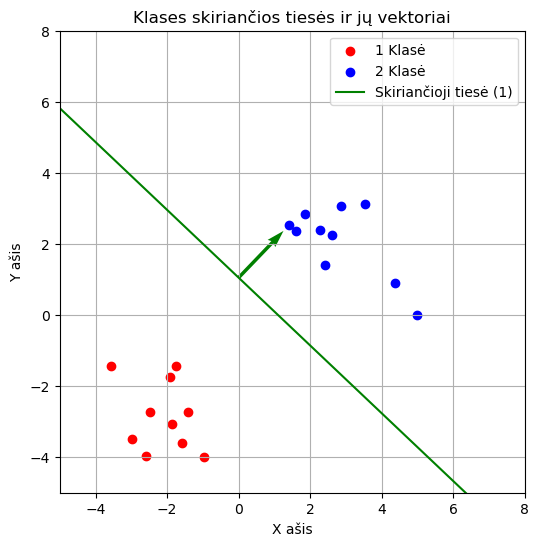

..
----------------------------------------------------------------------
Ran 6 tests in 0.507s

OK


In [17]:
import unittest
class TestGenerateData(unittest.TestCase):

    def test_shape(self):
        n, m = 2, 20
        class_0, class_1 = generate_data(n, m)
        self.assertEqual(class_0.shape, (m // n, n)) 
        self.assertEqual(class_1.shape, (m // n, n))

        #testing visualization
        self.assertIsNone(plot_data(class_0, class_1, [(3.7638915229603835, 3.9460666350384734, -4.149557886302221)]))
        
    def test_class_0_and_1_values(self):
        n, m = 2, 20
        class_0, class_1 = generate_data(n, m)
        self.assertAlmostEqual(class_0[0, 0], -2.5, delta=5)  
        self.assertAlmostEqual(class_0[0, 1], -2.5, delta=5)
        self.assertAlmostEqual(class_1[0, 0], 2.5, delta=5)
        self.assertAlmostEqual(class_1[0, 1], 2.5, delta=5)
        
    def test_seed(self):
        n, m = 2, 20
        class_0_1, class_1_1 = generate_data(n, m)
        class_0_2, class_1_2 = generate_data(n, m)
        np.testing.assert_array_equal(class_0_1, class_0_2)
        np.testing.assert_array_equal(class_1_1, class_1_2)

    def test_step_sigmoid(self):
        #step
        self.assertEqual(step_function(0.1), 1)
        self.assertEqual(step_function(0), 1)
        self.assertNotEqual(step_function(-3), 1)

        #sigmoid
        self.assertEqual(sigmoid_function(0.1), 1/(1+ pow(math.e, -0.1)))
        self.assertNotEqual(sigmoid_function(1), 1)

    def test_count_a(self):
        x = [0] * 2  
        x[0]=1
        x[1]=2.555
        w1=7
        w2=4
        b=2
        self.assertEqual(count_a(x, w1, w2, b, "step"), step_function(a = x[0]*w1 + x[1]*w2 + b))
        self.assertNotEqual(count_a(x, w1, w2, b, "sigmoid"), sigmoid_function(a = x[0]*w1 + x[1]*w2 + b))
        self.assertAlmostEqual(count_a(x, w1, w2, b, "sigmoid"), sigmoid_function(a = x[0]*w1 + x[1]*w2 + b), delta=0.00001)
        self.assertNotEqual(count_a(x, w1, w2, b, "none"), sigmoid_function(a = x[0]*w1 + x[1]*w2 + b))

    def test_calculate_weights(self):
        n, m = 2, 20
        class_0, class_1 = generate_data(n, m)
        first_array = (3.7638915229603835, 3.9460666350384734, -4.149557886302221)
        second_array = (3.507950893767788, 2.2996447022081856, -3.9126392813102506)
        self.assertEqual(calculate_weights(class_0, class_1, "step", 1), first_array)
        self.assertEqual(calculate_weights(class_0, class_1, "step", 11), second_array)
        self.assertNotEqual(calculate_weights(class_0, class_1, "step", 1), second_array)
        self.assertNotEqual(calculate_weights(class_0, class_1, "step", 11), first_array)
        self.assertNotEqual(calculate_weights(class_0, class_1, "step", 10101), first_array)
        
unittest.main(argv=['first-arg-is-ignored'], exit=False)